In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/StudentPerformanceFactors.csv")
df.dropna(inplace=True)

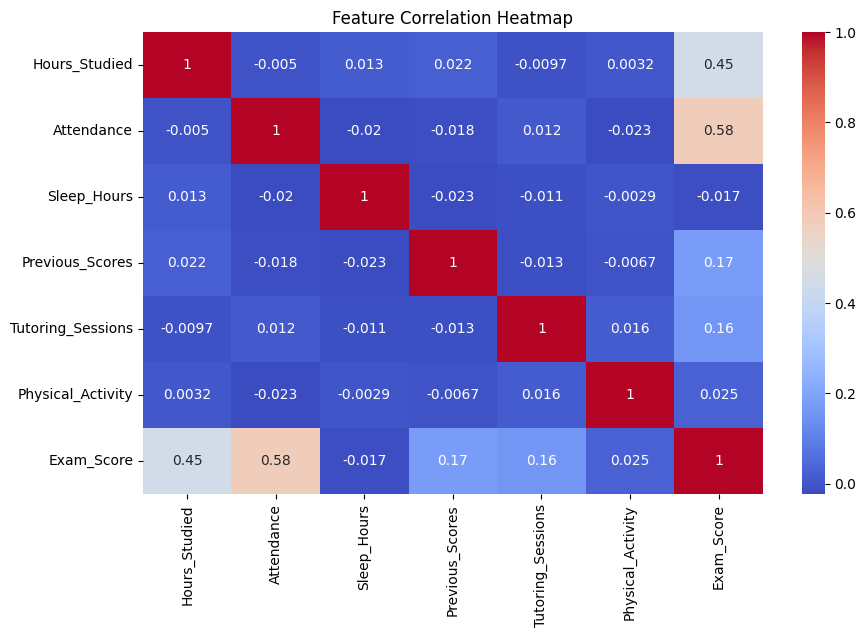

In [5]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

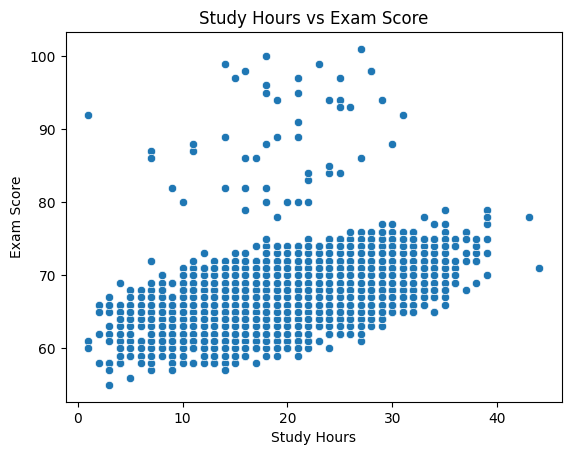

In [8]:
sns.scatterplot(data=df, x="Hours_Studied", y="Exam_Score")
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [12]:
X = df[['Hours_Studied']]
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

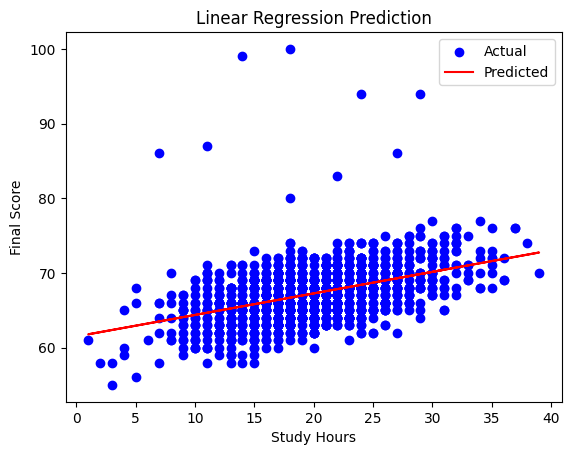

Linear Regression R^2 Score: 0.2051306083246669
Linear Regression RMSE: 3.5145033503249836


In [14]:
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Study Hours")
plt.ylabel("Final Score")
plt.legend()
plt.title("Linear Regression Prediction")
plt.show()

print("Linear Regression R^2 Score:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


In [17]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [18]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_poly_pred = poly_model.predict(X_test_poly)

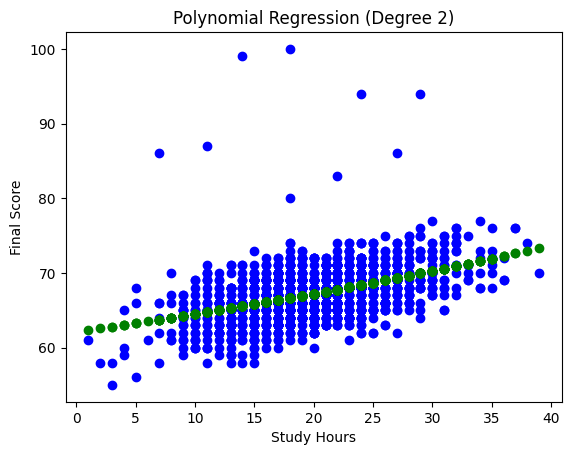

Polynomial Regression R^2 Score: 0.2050784559067499
Polynomial Regression RMSE: 3.5146186440091056


In [19]:
plt.scatter(X_test, y_test, color="blue")
plt.scatter(X_test, y_poly_pred, color="green")
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("Study Hours")
plt.ylabel("Final Score")
plt.show()

print("Polynomial Regression R^2 Score:", r2_score(y_test, y_poly_pred))
print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_poly_pred)))

In [22]:
X_multi = df[['Hours_Studied', 'Sleep_Hours']]
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train_m)
y_pred_m = lr_multi.predict(X_test_m)

print("Multivariable Linear Regression R^2 Score:", r2_score(y_test_m, y_pred_m))
print("Multivariable RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_m)))

Multivariable Linear Regression R^2 Score: 0.20485195984738314
Multivariable RMSE: 3.515119316423153


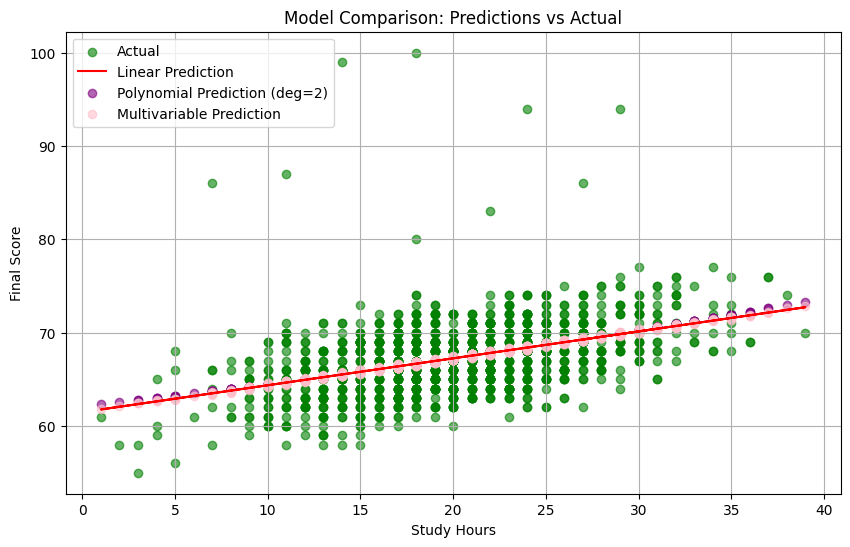

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='green', label='Actual', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Linear Prediction')
plt.scatter(X_test, y_poly_pred, color='purple', label='Polynomial Prediction (deg=2)', alpha=0.6)
plt.scatter(X_test_m['Hours_Studied'], y_pred_m, color='pink', label='Multivariable Prediction', alpha=0.6)
plt.title("Model Comparison: Predictions vs Actual")
plt.xlabel("Study Hours")
plt.ylabel("Final Score")
plt.legend()
plt.grid(True)
plt.show()